# Experiment 1: Hyperparameter Search Results 

In [1]:
import os
import sys
# import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter


sys.path.append('..')
from utils import load_yaml_config

In [2]:
def get_npy_metric(log_path, metric_name):
    arrs = []
    for subdir, dirs, files in os.walk(log_path):
        for file in files:
            filepath = subdir + os.sep + file

            if filepath.endswith(f"{metric_name}.npy"):
                arrs.append(np.load(filepath))
    return np.array(arrs)

In [3]:
def get_config(log_path):
    for subdir, dirs, files in os.walk(log_path):
        for file in files:
            filepath = subdir + os.sep + file

            if filepath.endswith(f".yaml"):
                return load_yaml_config(filepath)

### Noisy Stateless Cartpole Medium

Best performing hyperparameters: #0


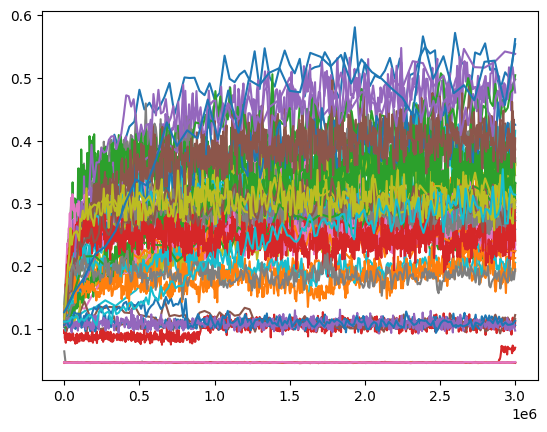

In [11]:
main_folder = '/home/tom/Documents/Master/Thesis/results/Experiment 1/NoistStatelessCartPoleMedium'

def create_results(path):
    eval_rewards = get_npy_metric(path, "eval_rewards")
    y = np.mean(eval_rewards, axis=0)
    std = np.std(eval_rewards, axis=0),
    x = np.linspace(0, 3e6, len(y))

    return x, y, std

fig, ax = plt.subplots(1,1)

subfolders = [ f.path for f in os.scandir(main_folder) if f.is_dir() ]

y_max_NSCM = []
for subfolder in subfolders:
    x, y, std = create_results(subfolder)
    y_max_NSCM.append(np.max(y))
    ax.plot(x,y)


print(f"Best performing hyperparameters: #{np.argmax(y_max_NSCM)}")
plt.show()

### Stateless Cartpole Easy

Best performing hyperparameters: #3


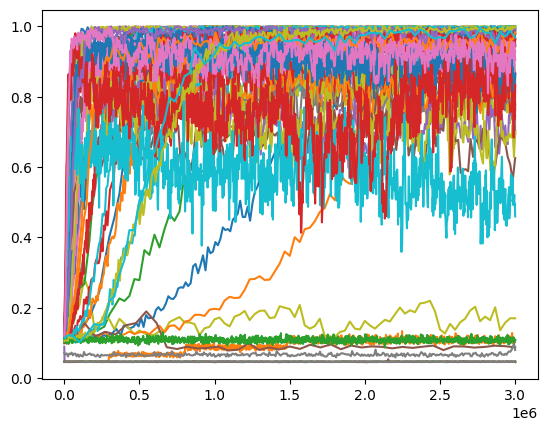

In [10]:
main_folder = '/home/tom/Documents/Master/Thesis/results/Experiment 1/StatelessCartPoleEasy'

def create_results(path):
    eval_rewards = get_npy_metric(path, "eval_rewards")
    y = np.mean(eval_rewards, axis=0)
    std = np.std(eval_rewards, axis=0),
    x = np.linspace(0, 3e6, len(y))

    return x, y, std

fig, ax = plt.subplots(1,1)
subfolders = [ f.path for f in os.scandir(main_folder) if f.is_dir() ]

y_max_SCPE = []
for subfolder in subfolders:
    x, y, std = create_results(subfolder)
    y_max_SCPE.append(np.max(y))
    ax.plot(x,y)


print(f"Best performing hyperparameters: #{np.argmax(y_max_SCPE)}")
plt.show()


### Environment comparison

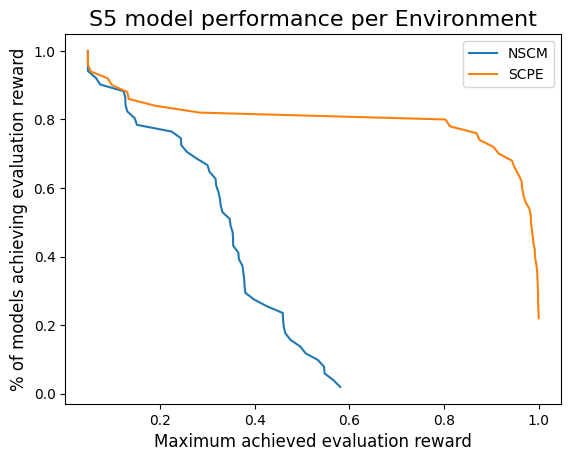

In [16]:
y_max_NSCM
y_max_SCPE


def compute_performance_score(sorted_list):
    
    performance_score = []

    last_score = 1
    curr_value = sorted_list[0]
    for i, x in enumerate(sorted_list):
        if x > curr_value:
            performance_score.append(1- (i / len(sorted_list)))
            curr_value = x
            last_score = 1- (i / len(sorted_list))
        else:
            performance_score.append(last_score)

    return performance_score


fig, ax = plt.subplots(1, 1)

def plot_performance_score(y_max, ax, label):
    sorted_list = (np.sort(y_max))
    performance_score = compute_performance_score(sorted_list)
    

    # print(len(y_max))

    ax.plot(sorted_list, performance_score, label=label)
plot_performance_score(y_max_NSCM, ax, "NSCM")
plot_performance_score(y_max_SCPE, ax, "SCPE")

ax.set_title('S5 model performance per Environment', fontsize=16)
ax.set_ylabel("% of models achieving evaluation reward", fontsize=12)
ax.set_xlabel("Maximum achieved evaluation reward", fontsize=12)
ax.legend()
plt.show()

# Runtime analysis

[np.float64(509.3805383046468), np.float64(155.92551557223), np.float64(325.43785365422565), np.float64(174.54643074671426), np.float64(90.66644899050395), np.float64(114.17777117093404), np.float64(54.530550400416054), np.float64(225.73035883903503), np.float64(126.36904740333557), np.float64(59.971288760503136), np.float64(117.96926665306091), np.float64(118.55531700452168), np.float64(346.48015936215717), np.float64(189.17462468147278), np.float64(73.35257077217102), np.float64(236.11076188087463), np.float64(53.758241971333824), np.float64(124.80677199363708), np.float64(183.88691878318787), np.float64(129.45355335871378), np.float64(119.42420013745625), np.float64(77.46946056683858), np.float64(108.4892418384552), np.float64(112.15955845514934), np.float64(281.0103828907013), np.float64(97.31060115496318), np.float64(391.17490124702454), np.float64(148.56092913945517), np.float64(78.11520044008891), np.float64(124.36283246676128), np.float64(75.25571139653523), np.float64(85.10630

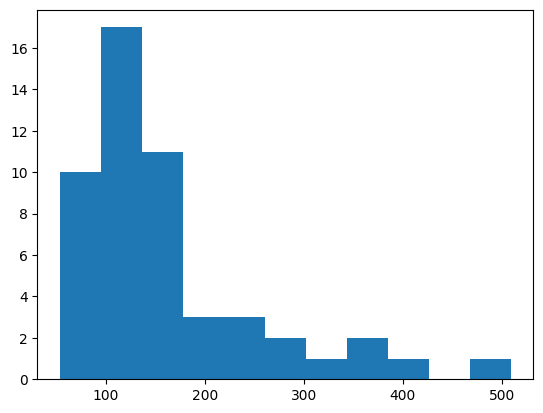

In [5]:
main_folder = '/home/tom/Documents/Master/Thesis/results/Experiment 1/NoistStatelessCartPoleMedium'

def get_runtime(path):
    runtime = get_npy_metric(path, "runtime")
    return np.mean(runtime, axis=0)

fig, ax = plt.subplots(1,1)

subfolders = [ f.path for f in os.scandir(main_folder) if f.is_dir() ]

runtimes = []
for subfolder in subfolders:
    runtimes.append(get_runtime(subfolder))

print(runtimes)

ax.hist(runtimes, 'auto')
plt.show()

### as a function of residual layers

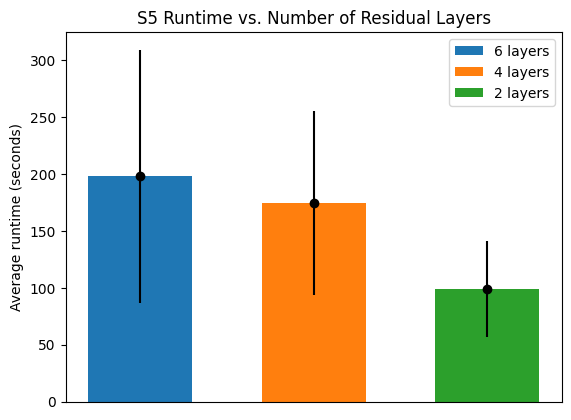

In [18]:
main_folder = '/home/tom/Documents/Master/Thesis/results/Experiment 1/NoistStatelessCartPoleMedium'

fig, ax = plt.subplots(1,1)

subfolders = [ f.path for f in os.scandir(main_folder) if f.is_dir() ]

runtimes = {}
for subfolder in subfolders:
    cfg = get_config(subfolder)
    if cfg.modelparameters.residuallayers in runtimes:
        runtimes[cfg.modelparameters.residuallayers].append(get_runtime(subfolder))
    else:
        runtimes[cfg.modelparameters.residuallayers] = [get_runtime(subfolder)]

x = np.linspace(0, 1, len(runtimes.keys()))
for i, key in enumerate(runtimes.keys()):
    ax.bar(
        x[i], 
        np.mean(runtimes[key]), 
        width=0.3,
        label=f"{key} layers"
    )
    ax.errorbar(x[i], 
                y= np.mean(runtimes[key]), 
                yerr= np.std(runtimes[key]),
                fmt='o',
                color='black'
    )

ax.legend()
ax.set_xticks([])
ax.set_ylabel('Average runtime (seconds)')
ax.set_title('S5 Runtime vs. Number of Residual Layers')
plt.show()


### as a function of H

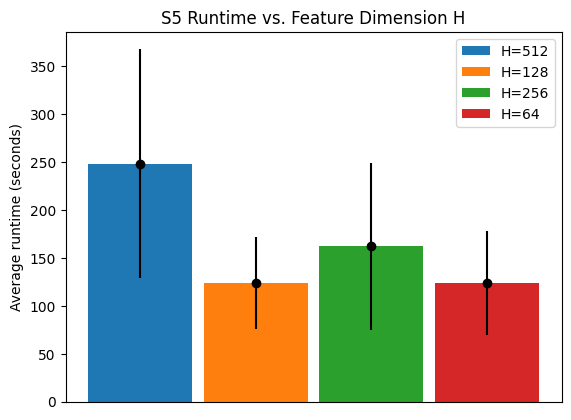

In [48]:
main_folder = '/home/tom/Documents/Master/Thesis/results/Experiment 1/NoistStatelessCartPoleMedium'

fig, ax = plt.subplots(1,1)

subfolders = [ f.path for f in os.scandir(main_folder) if f.is_dir() ]

runtimes = {}
for subfolder in subfolders:
    cfg = get_config(subfolder)
    if cfg.modelparameters.kernelparameters.H in runtimes:
        runtimes[cfg.modelparameters.kernelparameters.H].append(get_runtime(subfolder))
    else:
        runtimes[cfg.modelparameters.kernelparameters.H] = [get_runtime(subfolder)]

x = np.linspace(0, 1, len(runtimes.keys()))
for i, key in enumerate(runtimes.keys()):
    # print(key)
    # print(len(runtimes[key]))
    ax.bar(
        x[i], 
        np.mean(runtimes[key]), 
        width=0.3,
        label=f"H={key}"
    )
    ax.errorbar(x[i], 
                y= np.mean(runtimes[key]), 
                yerr= np.std(runtimes[key]),
                fmt='o',
                color='black'
    )

ax.legend()
ax.set_xticks([])
ax.set_ylabel('Average runtime (seconds)')
ax.set_title('S5 Runtime vs. Feature Dimension H')
plt.show()



### Combination runtime comparison

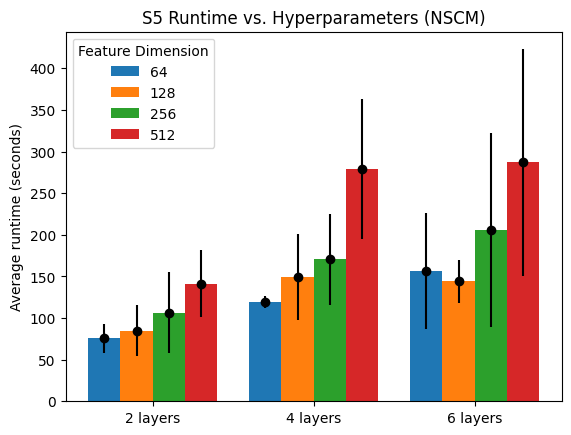

In [7]:
main_folder = '/home/tom/Documents/Master/Thesis/results/Experiment 1/NoistStatelessCartPoleMedium'

subfolders = [ f.path for f in os.scandir(main_folder) if f.is_dir() ]

# Create list of residuallayer values
residual_list = []
for subfolder in subfolders:
    cfg = get_config(subfolder)
    if cfg.modelparameters.residuallayers not in residual_list:
        residual_list.append(cfg.modelparameters.residuallayers)

#sort 
residual_list.sort()

# Create list of H values
H_values = [] 
for subfolder in subfolders:
    cfg = get_config(subfolder)
    if cfg.modelparameters.kernelparameters.H not in H_values:
        H_values.append(cfg.modelparameters.kernelparameters.H)
        
# sort
H_values.sort()

# Create dictionaries based on H values with all corresponding mean runtimes and std runtimes

score_dict = {key: [[] for i in residual_list] for key in H_values}

for subfolder in subfolders:
    cfg = get_config(subfolder)
    index = residual_list.index(cfg.modelparameters.residuallayers)

    score_dict[cfg.modelparameters.kernelparameters.H][index].append(get_runtime(subfolder))


fig, ax = plt.subplots(1,1)

# # print(runtimes)


bar_width = 0.2
multiplier = 0

x = np.arange(len(residual_list))

for H_val, runtimes in score_dict.items():
    # print(H_val)
    
    values = [np.mean(runtime) for runtime in runtimes]
    stds = [np.std(runtime) for runtime in runtimes]
    offset = bar_width * multiplier 
    rects = ax.bar(
        x + offset, values, bar_width, label=H_val
    )
    multiplier += 1
    ax.errorbar(x + offset, 
                y= values, 
                yerr= stds,
                fmt='o',
                color='black'
            )    

ax.legend(loc='upper left', title="Feature Dimension")
ax.set_xticks(x + 0.5 *offset, [f"{res} layers" for res in residual_list])
ax.set_ylabel('Average runtime (seconds)')
ax.set_title('S5 Runtime vs. Hyperparameters (NSCM)')
plt.show()


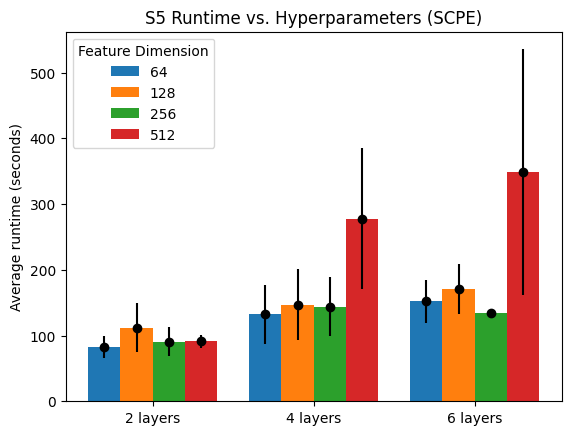

In [13]:
main_folder = '/home/tom/Documents/Master/Thesis/results/Experiment 1/StatelessCartPoleEasy'

subfolders = [ f.path for f in os.scandir(main_folder) if f.is_dir() ]

# Create list of residuallayer values
residual_list = []
for subfolder in subfolders:
    cfg = get_config(subfolder)
    if cfg.modelparameters.residuallayers not in residual_list:
        residual_list.append(cfg.modelparameters.residuallayers)

#sort 
residual_list.sort()

# Create list of H values
H_values = [] 
for subfolder in subfolders:
    cfg = get_config(subfolder)
    if cfg.modelparameters.kernelparameters.H not in H_values:
        H_values.append(cfg.modelparameters.kernelparameters.H)
        
# sort
H_values.sort()

# Create dictionaries based on H values with all corresponding mean runtimes and std runtimes

score_dict = {key: [[] for i in residual_list] for key in H_values}

for subfolder in subfolders:
    cfg = get_config(subfolder)
    index = residual_list.index(cfg.modelparameters.residuallayers)

    score_dict[cfg.modelparameters.kernelparameters.H][index].append(get_runtime(subfolder))


fig, ax = plt.subplots(1,1)

# # print(runtimes)


bar_width = 0.2
multiplier = 0

x = np.arange(len(residual_list))

for H_val, runtimes in score_dict.items():
    # print(H_val)
    
    values = [np.mean(runtime) for runtime in runtimes]
    stds = [np.std(runtime) for runtime in runtimes]
    offset = bar_width * multiplier 
    rects = ax.bar(
        x + offset, values, bar_width, label=H_val
    )
    multiplier += 1
    ax.errorbar(x + offset, 
                y= values, 
                yerr= stds,
                fmt='o',
                color='black'
            )    

ax.legend(loc='upper left', title="Feature Dimension")
ax.set_xticks(x + 0.5 *offset, [f"{res} layers" for res in residual_list])
ax.set_ylabel('Average runtime (seconds)')
ax.set_title('S5 Runtime vs. Hyperparameters (SCPE)')
plt.show()


### Performance Score

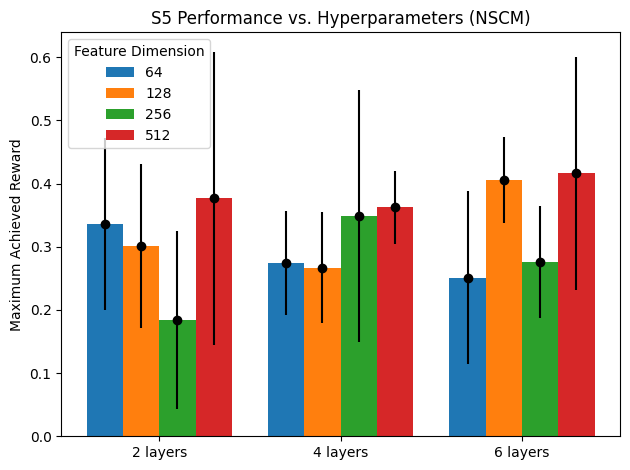

In [11]:
main_folder = '/home/tom/Documents/Master/Thesis/results/Experiment 1/NoistStatelessCartPoleMedium'

subfolders = [ f.path for f in os.scandir(main_folder) if f.is_dir() ]

# Create list of residuallayer values
residual_list = []
for subfolder in subfolders:
    cfg = get_config(subfolder)
    if cfg.modelparameters.residuallayers not in residual_list:
        residual_list.append(cfg.modelparameters.residuallayers)

#sort 
residual_list.sort()

# Create list of H values
H_values = [] 
for subfolder in subfolders:
    cfg = get_config(subfolder)
    if cfg.modelparameters.kernelparameters.H not in H_values:
        H_values.append(cfg.modelparameters.kernelparameters.H)
        
# sort
H_values.sort()

# Create dictionaries based on H values with all corresponding mean runtimes and std runtimes

score_dict = {key: [[] for i in residual_list] for key in H_values}

for subfolder in subfolders:
    cfg = get_config(subfolder)
    index = residual_list.index(cfg.modelparameters.residuallayers)

    x, y, std = create_results(subfolder)
    score_dict[cfg.modelparameters.kernelparameters.H][index].append(np.max(y))


fig, ax = plt.subplots(1,1)

# # print(runtimes)


bar_width = 0.2
multiplier = 0

x = np.arange(len(residual_list))

for H_val, runtimes in score_dict.items():
    # print(H_val)
    
    values = [np.mean(runtime) for runtime in runtimes]
    stds = [np.std(runtime) for runtime in runtimes]
    offset = bar_width * multiplier 
    rects = ax.bar(
        x + offset, values, bar_width, label=H_val
    )
    multiplier += 1
    ax.errorbar(x + offset, 
                y= values, 
                yerr= stds,
                fmt='o',
                color='black'
            )    

ax.legend(loc='upper left', title="Feature Dimension")
ax.set_xticks(x + 0.5 *offset, [f"{res} layers" for res in residual_list])
ax.set_ylabel('Maximum Achieved Reward')
ax.set_title('S5 Performance vs. Hyperparameters (NSCM)')
plt.tight_layout()
plt.show()


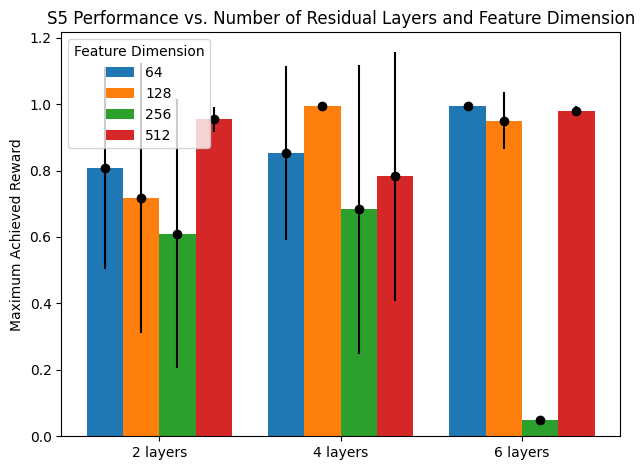

In [12]:
main_folder = '/home/tom/Documents/Master/Thesis/results/Experiment 1/StatelessCartPoleEasy'

subfolders = [ f.path for f in os.scandir(main_folder) if f.is_dir() ]

# Create list of residuallayer values
residual_list = []
for subfolder in subfolders:
    cfg = get_config(subfolder)
    if cfg.modelparameters.residuallayers not in residual_list:
        residual_list.append(cfg.modelparameters.residuallayers)

#sort 
residual_list.sort()

# Create list of H values
H_values = [] 
for subfolder in subfolders:
    cfg = get_config(subfolder)
    if cfg.modelparameters.kernelparameters.H not in H_values:
        H_values.append(cfg.modelparameters.kernelparameters.H)
        
# sort
H_values.sort()

# Create dictionaries based on H values with all corresponding mean runtimes and std runtimes

score_dict = {key: [[] for i in residual_list] for key in H_values}

for subfolder in subfolders:
    cfg = get_config(subfolder)
    index = residual_list.index(cfg.modelparameters.residuallayers)

    x, y, std = create_results(subfolder)
    score_dict[cfg.modelparameters.kernelparameters.H][index].append(np.max(y))


fig, ax = plt.subplots(1,1)

# # print(runtimes)


bar_width = 0.2
multiplier = 0

x = np.arange(len(residual_list))

for H_val, runtimes in score_dict.items():
    # print(H_val)
    
    values = [np.mean(runtime) for runtime in runtimes]
    stds = [np.std(runtime) for runtime in runtimes]
    offset = bar_width * multiplier 
    rects = ax.bar(
        x + offset, values, bar_width, label=H_val
    )
    multiplier += 1
    ax.errorbar(x + offset, 
                y= values, 
                yerr= stds,
                fmt='o',
                color='black'
            )    

ax.legend(loc='upper left', title="Feature Dimension")
ax.set_xticks(x + 0.5 *offset, [f"{res} layers" for res in residual_list])
ax.set_ylabel('Maximum Achieved Reward')
ax.set_title('S5 Performance vs. Number of Residual Layers and Feature Dimension')
plt.tight_layout()
plt.show()
